# TQC 人工智慧 機器學習 證照 攻略(中)
## 第二類非監督學習 解題分享 (3/5)

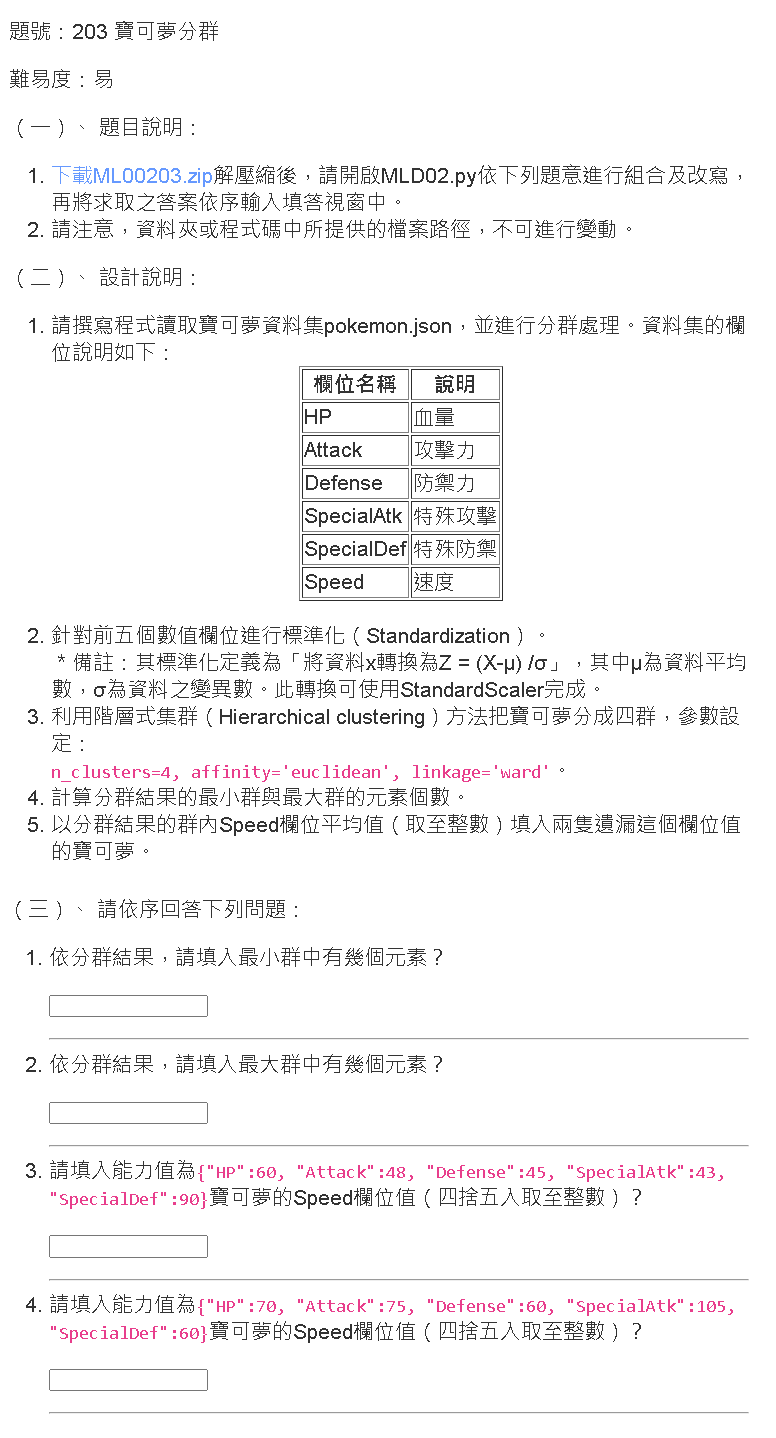

In [1]:
import pandas as pd
# 載入寶可夢資料
data = pd.read_json('pokemon.json')
df = data.copy()

# 取出目標欄位
X = df.iloc[:, :5]
# 特徵標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# 利用 Hierarchical Clustering 進行分群，除以下參數設定外，其餘為預設值
# #############################################################################
# n_clusters=4, affinity='euclidean', linkage='ward'
# #############################################################################
from sklearn.cluster import AgglomerativeClustering
clt = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clt.fit(X)

# 計算每一群的個數
labels = pd.Series(clt.labels_,name='labels')
print(f"最小群個數:{min(labels.value_counts())}")
print(f"最大群個數:{max(labels.value_counts())}")
df = pd.concat([df, labels], axis=1)
bylabels_speed_mean = df.groupby('labels')['Speed'].mean()
print(f"{round(bylabels_speed_mean)}")

# 找到 Speed 有遺漏值的兩隻寶可夢，並填入組內平均
print(df[df['Speed'].isna()==True])

最小群個數:15
最大群個數:76
labels
0    58.0
1    57.0
2    92.0
3    82.0
Name: Speed, dtype: float64
    HP  Attack  Defense  SpecialAtk  SpecialDef  Speed  labels
19  60      48       45          43          90    NaN       0
63  70      75       60         105          60    NaN       2
